In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, OrdinalEncoder
from scipy import stats


In [ ]:
url ='https://drive.google.com/uc?id=1KEMfwDKxd5klTA9tFo6Nsgmi0pANIl7m'
data = pd.read_csv(url)

In [ ]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Ford,Fusion,SE,Sedan,automatic,3fa6p0h71dr236627,wi,47.0,17548.0,white,black,lease plan usa,14200,Wed Feb 04 2015 02:30:00 GMT-0800 (PST)
1,2013,Infiniti,JX,JX35,SUV,automatic,5n1al0mn8dc329790,ca,43.0,22035.0,gray,black,infiniti of montclair,31000,Tue Jun 16 2015 05:00:00 GMT-0700 (PDT)
2,2009,Jeep,Grand Cherokee,Laredo,SUV,automatic,1j8gr48k69c529636,ne,34.0,95559.0,silver,gray,dm northwest inc,11600,Thu Jan 15 2015 03:00:00 GMT-0800 (PST)
3,2008,Ford,F-350 Super Duty,XLT,Crew Cab,automatic,1ftww31rx8ed43632,wa,43.0,135870.0,white,gray,lexus of tacoma at fife,15400,Wed Feb 11 2015 05:20:00 GMT-0800 (PST)
4,2014,Kia,Sportage,LX,SUV,automatic,kndpbcac3e7642651,nv,44.0,13604.0,white,gray,kia motors america inc,18500,Fri Mar 06 2015 04:00:00 GMT-0800 (PST)


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,50000.0,2010.044000,3.953593,1986.0,2007.0,2012.0,2013.0,2015.0
condition,48923.0,30.619422,13.471054,1.0,23.0,35.0,42.0,49.0
odometer,49995.0,68103.882268,53485.779411,1.0,28312.5,51806.0,98735.5,999999.0
sellingprice,50000.0,13667.281580,9841.357223,1.0,6900.0,12200.0,18300.0,159000.0


In [ ]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          50000 non-null  int64  
 1   make          49047 non-null  object 
 2   model         49037 non-null  object 
 3   trim          49012 non-null  object 
 4   body          48782 non-null  object 
 5   transmission  44014 non-null  object 
 6   vin           49999 non-null  object 
 7   state         50000 non-null  object 
 8   condition     48923 non-null  float64
 9   odometer      49995 non-null  float64
 10  color         49946 non-null  object 
 11  interior      49946 non-null  object 
 12  seller        50000 non-null  object 
 13  sellingprice  50000 non-null  int64  
 14  saledate      50000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.7+ MB


# **EDA**

In [ ]:
data_numeric = data.select_dtypes(include=[np.number])
categorical_col = data.drop(data_numeric, axis= 1)
categorical_col = categorical_col.drop('saledate', axis= 1)

In [ ]:
data_numeric

,year,condition,odometer,sellingprice
0,2013,47.0,17548.0,14200
1,2013,43.0,22035.0,31000
2,2009,34.0,95559.0,11600
3,2008,43.0,135870.0,15400
4,2014,44.0,13604.0,18500
...,...,...,...,...
49995,2013,46.0,31313.0,22600
49996,2012,39.0,23385.0,9700
49997,2012,39.0,75549.0,18400
49998,2007,19.0,78352.0,9100


In [ ]:
categorical_col

,make,model,trim,body,transmission,vin,state,color,interior,seller
0,Ford,Fusion,SE,Sedan,automatic,3fa6p0h71dr236627,wi,white,black,lease plan usa
1,Infiniti,JX,JX35,SUV,automatic,5n1al0mn8dc329790,ca,gray,black,infiniti of montclair
2,Jeep,Grand Cherokee,Laredo,SUV,automatic,1j8gr48k69c529636,ne,silver,gray,dm northwest inc
3,Ford,F-350 Super Duty,XLT,Crew Cab,automatic,1ftww31rx8ed43632,wa,white,gray,lexus of tacoma at fife
4,Kia,Sportage,LX,SUV,automatic,kndpbcac3e7642651,nv,white,gray,kia motors america inc
...,...,...,...,...,...,...,...,...,...,...
49995,Ford,F-150,XLT,SuperCrew,automatic,1ftew1cm2dkf73954,md,red,gray,ars/enterprise
49996,Nissan,Sentra,2,Sedan,automatic,3n1ab6ap6cl754270,ca,gray,gray,metro nissan of montclair
49997,Toyota,Highlander,Base,SUV,automatic,5tdzk3eh5cs064330,nc,black,tan,fleet lease remarketing
49998,Chrysler,Aspen,Limited,SUV,automatic,1a8hx58n57f585637,ca,black,gray,a l financial


Correlation Matrix:
                  year  condition  odometer  sellingprice
year          1.000000   0.340643 -0.775918      0.582858
condition     0.340643   1.000000 -0.319129      0.321252
odometer     -0.775918  -0.319129  1.000000     -0.576537
sellingprice  0.582858   0.321252 -0.576537      1.000000


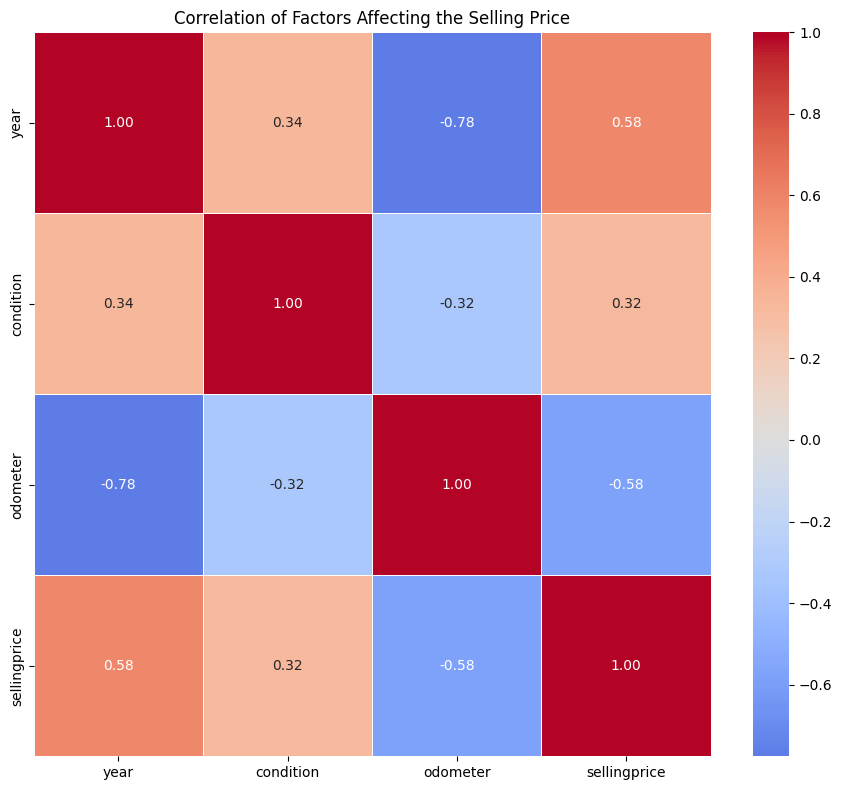

In [ ]:
# Correlations between numerical columns in the dataset.
#data_numeric = data_clean.select_dtypes(include=[np.number])

corr_matrix = data_numeric.corr()

print('Correlation Matrix:')
print(corr_matrix)

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation of Factors Affecting the Selling Price')
plt.tight_layout()
plt.show()

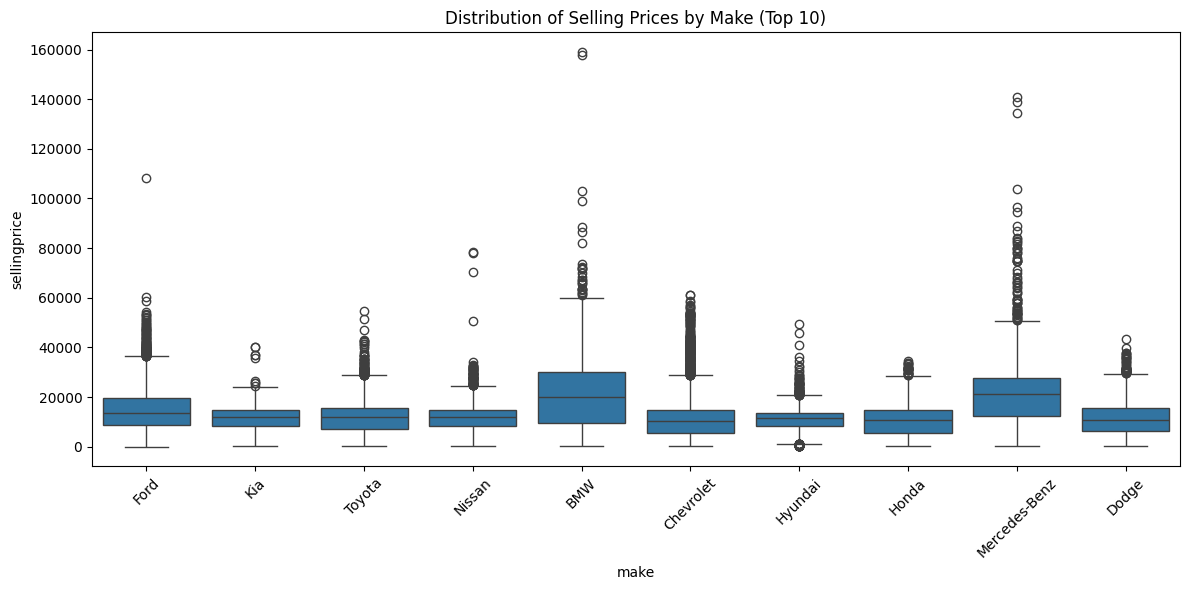

In [ ]:
# Box plot of prices by make (top 10 makes by frequency)
plt.figure(figsize=(12, 6))
top_makes = data['make'].value_counts().nlargest(10).index
df_top_makes = data[data['make'].isin(top_makes)]
sns.boxplot(x='make', y='sellingprice', data=df_top_makes)
plt.xticks(rotation=45)
plt.title('Distribution of Selling Prices by Make (Top 10)')
plt.tight_layout()
plt.show()

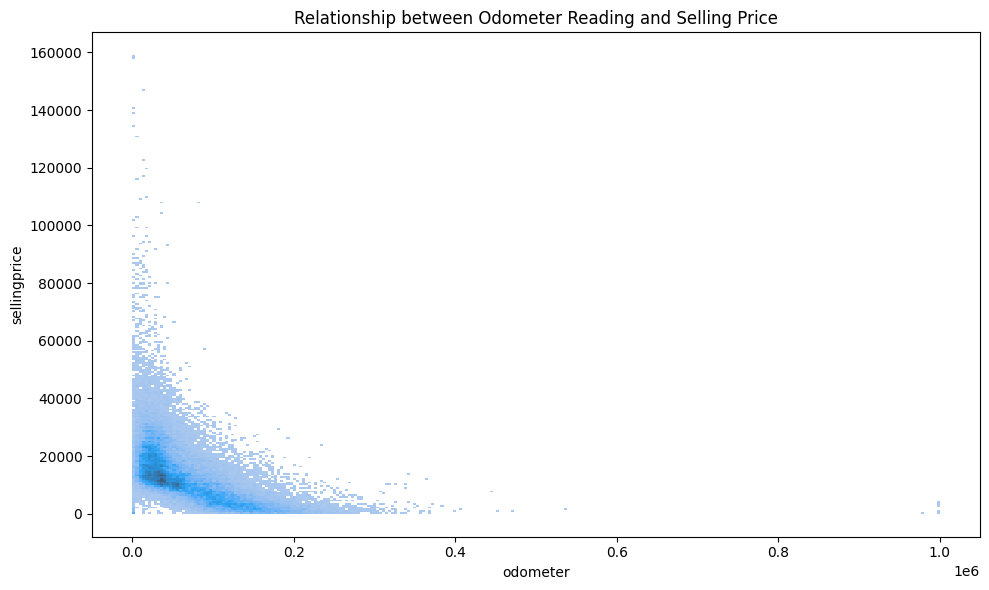

In [ ]:

# Scatter plot of price vs odometer with regression line
plt.figure(figsize=(10, 6))
sns.histplot(x='odometer', y='sellingprice', data=data)
plt.title('Relationship between Odometer Reading and Selling Price')
plt.tight_layout()
plt.show()

In [ ]:
#average price by condition
avg_price_condition = data.groupby('condition')['sellingprice'].agg(['mean', 'count']).round(2)

Average Price by Condition:
               mean  count
condition                 
1.0         3995.99    679
2.0         5846.49   1940
3.0        12490.95    969
4.0        17760.03   1804
5.0        25006.00    983
11.0        2937.50     12
12.0        2990.91     11
13.0        4050.00      6
14.0        5855.88     17
15.0        4573.33     15
16.0        5828.12     16
17.0        2966.67     15
18.0        3893.18     22
19.0        5124.85   3723
21.0        7479.61    816
22.0        7521.30    540
23.0        8163.06    739
24.0        8443.24    854
25.0        8813.44   1148
26.0        9316.98   1090
27.0        9473.09   1437
28.0       10089.55   1699
29.0       10676.51   1677
31.0       11515.53    825
32.0       11910.52    906
33.0       12225.38    934
34.0       12665.83   1523
35.0       13338.79   2382
36.0       14258.23   2049
37.0       15082.86   2307
38.0       15980.46   1681
39.0       16176.96   1816
41.0       17388.04   2036
42.0       17770.03   2165


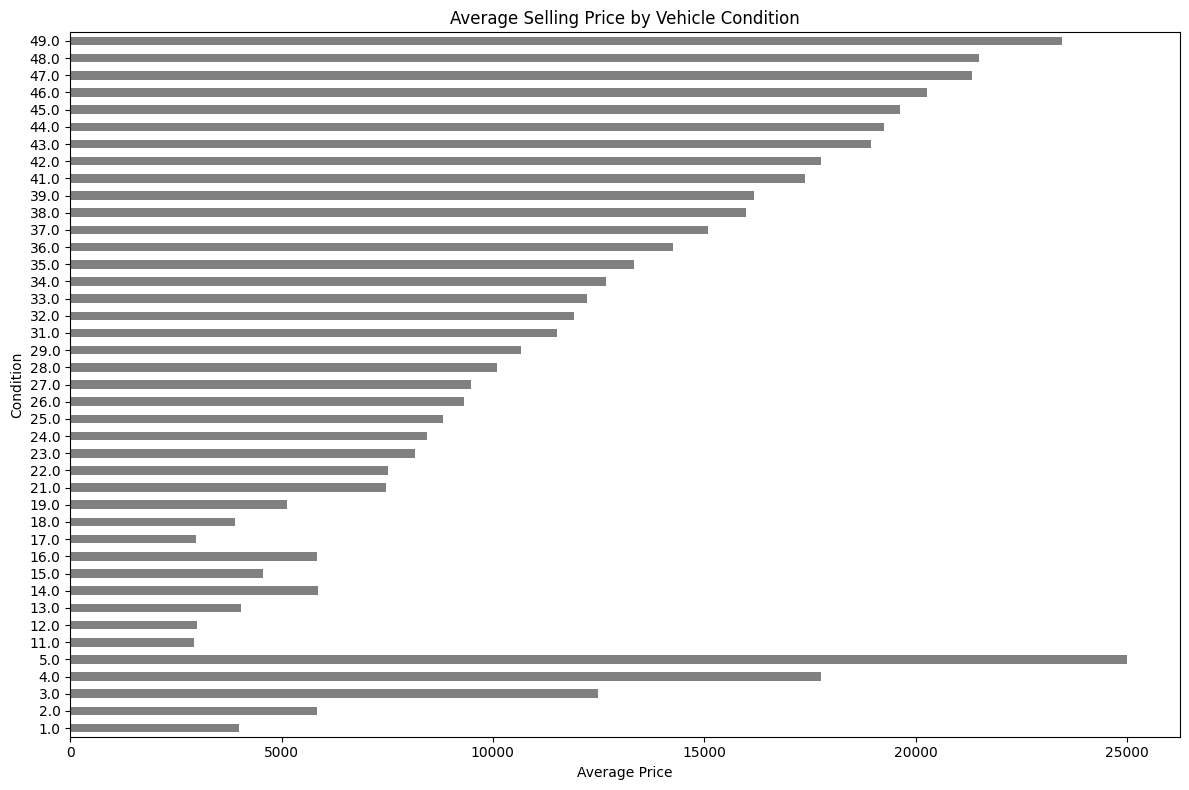

In [ ]:
plt.figure(figsize= (12,8))
avg_price_condition['mean'].plot(kind='barh', color='grey')
plt.title('Average Selling Price by Vehicle Condition')
plt.xlabel('Average Price')
plt.ylabel('Condition')
plt.xticks(rotation=0)
plt.tight_layout()
print("\
Average Price by Condition:")
print(avg_price_condition)
plt.show()

In [ ]:
#average price by body type
avg_price_body = data.groupby('body')['sellingprice'].agg(['mean', 'count']).round(2)

Average Price by Body Type:
                        mean  count
body                               
Access Cab          12214.29     21
Beetle Convertible  18925.00      4
CTS Coupe           23522.22      9
CTS Wagon           19000.00      1
CTS-V Coupe         38375.00      4
...                      ...    ...
supercrew           22813.16    133
suv                 17150.00   2183
tsx sport wagon     22250.00      1
van                 14626.32     57
wagon               11061.65    236

[73 rows x 2 columns]


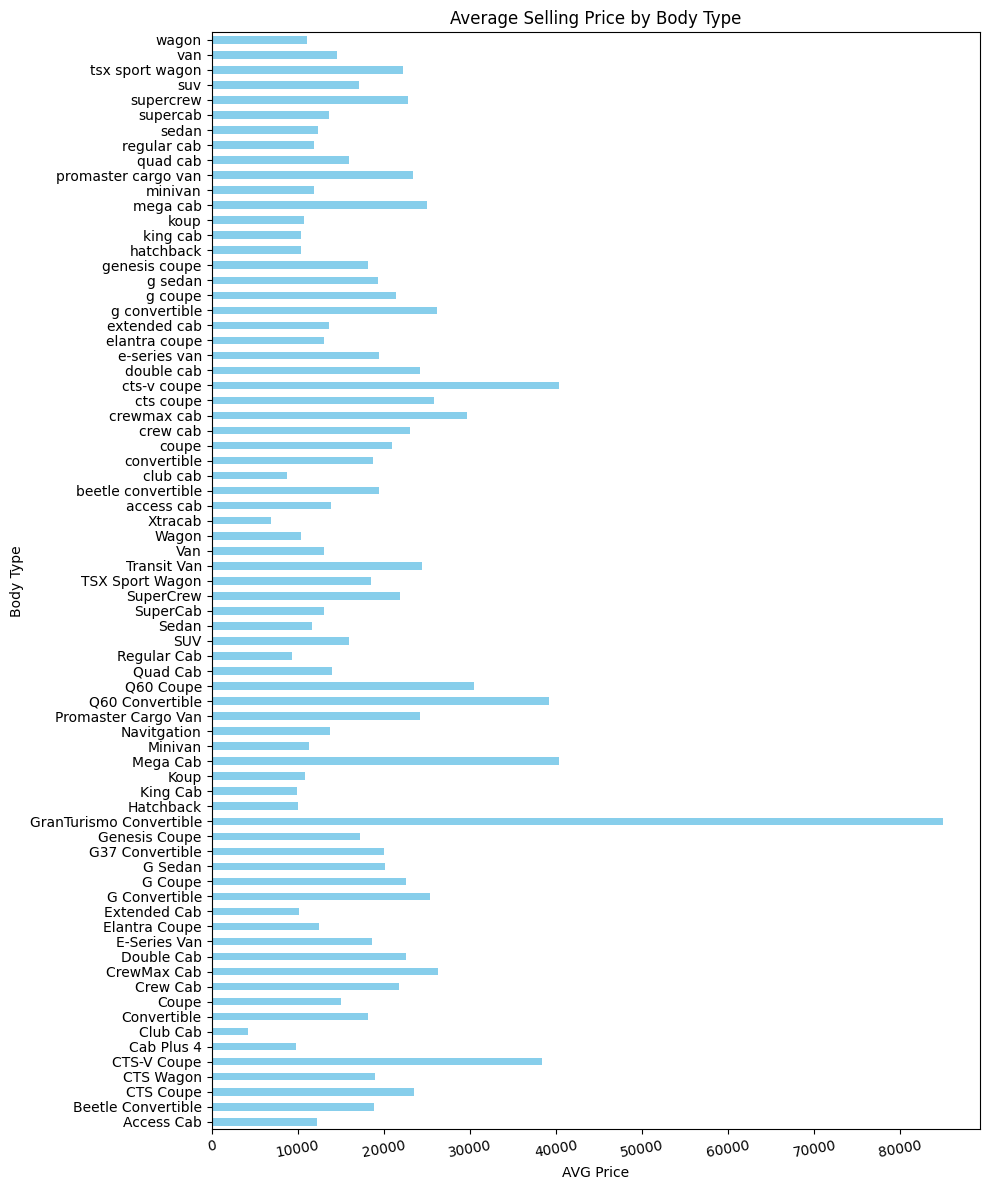

In [ ]:
#Selling Price by Body Type
plt.figure(figsize= (10,12))
avg_price_body['mean'].plot(kind='barh', color='skyblue')
plt.title('Average Selling Price by Body Type')
plt.xlabel('AVG Price')
plt.ylabel('Body Type')
plt.xticks(rotation=10)
plt.tight_layout()
print("\
Average Price by Body Type:")
print(avg_price_body)
plt.show()

In [ ]:
# Impact of year on price
year_impact = stats.pearsonr(data['year'], data['sellingprice'])
print("\
Correlation between Year and Price:")
print(f"Correlation coefficient: {year_impact[0]:.3f}")
print(f"P-value: {year_impact[1]:.3f}")

Correlation between Year and Price:
Correlation coefficient: 0.583
P-value: 0.000


## **Key Findings:**
Moderate positive relationship as years increase, prices tend to increase as well.

P-value of 0.000: The correlation is statistically significant (very unlikely to be due to chance).

* Newer cars and better condition are strongly associated with higher prices.

* Higher odometer readings (more miles) are associated with lower prices.
* Make and body type also play a significant role in determining price.

# **Models: Training , Evaluation and Saving**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Select features and target
y = data['sellingprice']
features = ['year', 'odometer', 'condition', 'make', 'model', 'body', 'transmission', 'state', 'color', 'interior']
X = data[features]

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identifying categorical and numeric columns
categorical_cols = ['make', 'model', 'body', 'transmission', 'state', 'color', 'interior']
numeric_cols = ['year', 'odometer', 'condition']

# Preprocessing pipelines

In [ ]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [ ]:
# Defining models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R2': r2})

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)


               Model         RMSE        R2
0  Linear Regression  4051.940164  0.815701
1      Random Forest  3179.140024  0.886547
2  Gradient Boosting  4735.735798  0.748248


In [ ]:
# Plotting the Evaluation
dataf = {
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [4051.94, 3179.14, 4735.74],
    'R2': [0.816, 0.887, 0.748]
}
df = pd.DataFrame(dataf)

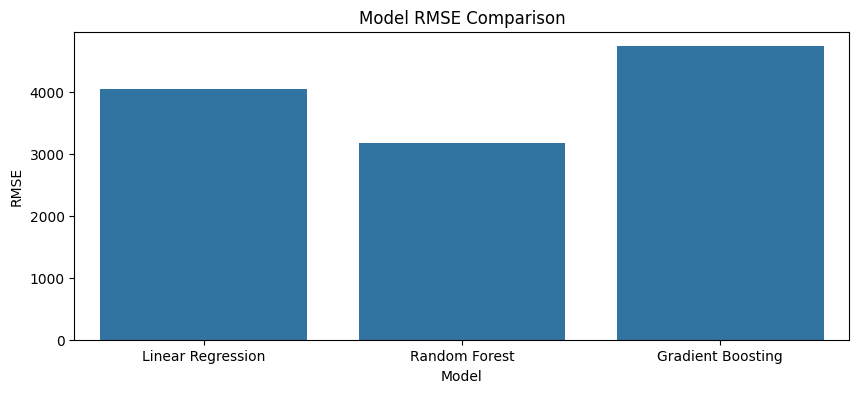

In [ ]:
# RMSE comparison
plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='RMSE', data=df)
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

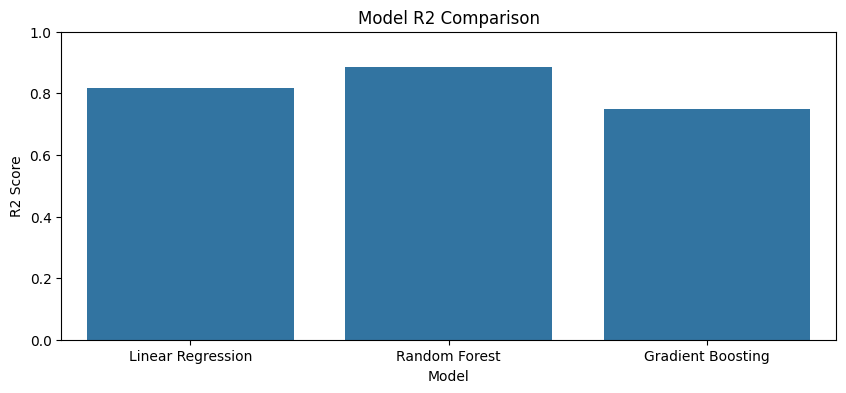

In [ ]:
# R2 comparison
plt.figure(figsize=(10, 4))
sns.barplot(x='Model', y='R2', data=df)
plt.title('Model R2 Comparison')
plt.ylabel('R2 Score')
plt.ylim(0, 1)  # R2 ranges from 0 to 1
plt.show()

The Random Forest model performs best (lowest RMSE, highest R²), followed by Linear Regression, with Gradient Boosting performing less effectively on this dataset.

In [ ]:
metrics = {
    'Linear Regression': {'RMSE': 4051.94, 'R2': 0.816},
    'Random Forest': {'RMSE': 3179.14, 'R2': 0.887},
    'Gradient Boosting': {'RMSE': 4735.74, 'R2': 0.748}
}

In [ ]:
import joblib
# Finding the best model based on RMSE (lowest RMSE)
best_model_name = min(metrics, key=lambda k: metrics[k]['RMSE'])
best_model = models[best_model_name]

# Saving the best model pipeline
joblib.dump(pipe, f"{best_model_name.replace(' ', '_').lower()}_best_model.joblib")

print(f"Best model '{best_model_name}' saved as {best_model_name.replace(' ', '_').lower()}_best_model.joblib")

Best model 'Random Forest' saved as random_forest_best_model.joblib
